# Exploring slopes

In [13]:
# imports
import numpy as np

import seaborn as sns

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

In [6]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load table

In [2]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [3]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,...,UID,pp_file,pp_root,field_size,pp_type,pp_idx,U0,U1,zonal_slope,merid_slope
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,...,1047103981024267577,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,0,-2.209477,5.983506,-1.19,-2.13
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,...,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1,-2.575606,6.238604,-0.68,-0.90
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,...,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2,-4.080777,6.772544,-0.72,-0.59
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,...,1051129071619856914,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,3,-0.867894,7.890549,-1.37,-1.29
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,...,1070107901927015548,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,4,4.985051,7.191708,-1.90,-2.02


## $\Delta T$

In [25]:
modis_tbl['DT'] = modis_tbl.T90 - modis_tbl.T10

In [27]:
modis_tbl['logDT'] = np.log10(modis_tbl.DT)

# Slopes

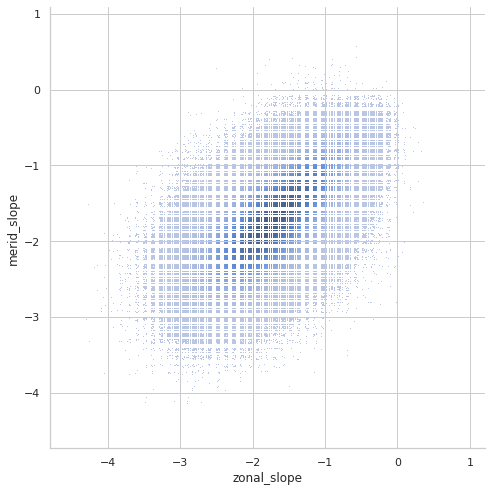

In [8]:
fg = sns.displot(modis_tbl, x='zonal_slope', y='merid_slope', height=7.)

## Max slope

In [23]:
modis_tbl['min_slope'] = np.minimum(modis_tbl.zonal_slope, modis_tbl.merid_slope)

# Slope vs. LL

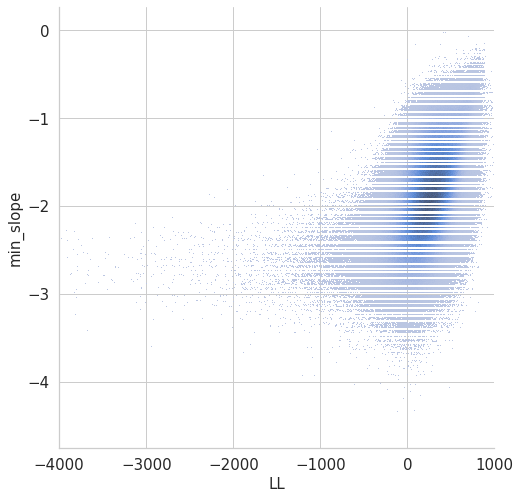

In [24]:
fg_LL = sns.displot(modis_tbl, x='LL', y='min_slope', height=7.)
fg_LL.set(xlim=(-4000, 1000.))
plotting.set_fontsize(fg_LL.ax, 15.)

# Slope vs. $\Delta T$

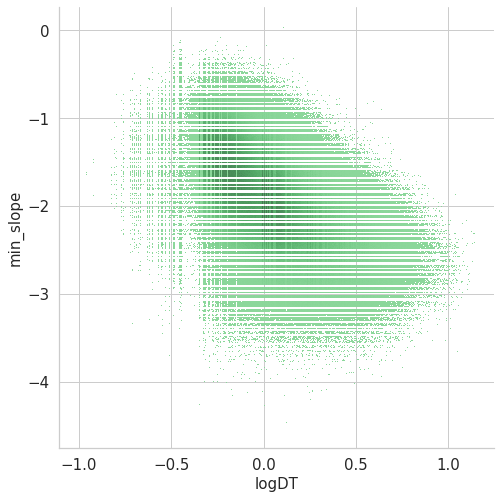

In [29]:
fg_DT = sns.displot(modis_tbl, x='logDT', y='min_slope', height=7., color='g')
#fg_DT.set(xlim=(-4000, 1000.))
plotting.set_fontsize(fg_DT.ax, 15.)

# Slope vs. $U_1$

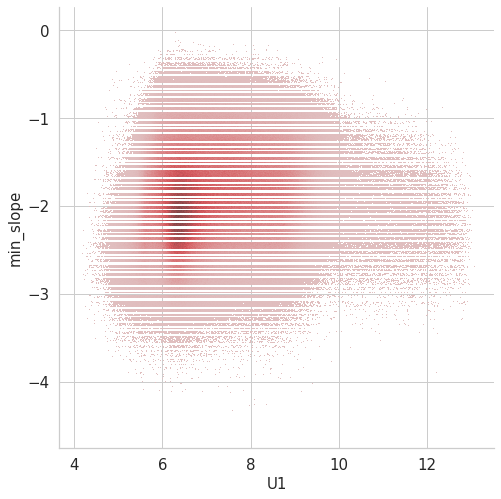

In [30]:
fg_U1 = sns.displot(modis_tbl, x='U1', y='min_slope', height=7., color='r')
#fg_DT.set(xlim=(-4000, 1000.))
plotting.set_fontsize(fg_U1.ax, 15.)

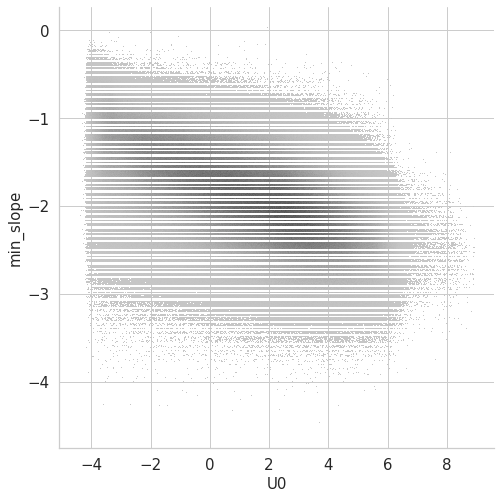

In [31]:
fg_U0 = sns.displot(modis_tbl, x='U0', y='min_slope', height=7., color='k')
#fg_DT.set(xlim=(-4000, 1000.))
plotting.set_fontsize(fg_U0.ax, 15.)